In [173]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
#Kearas libraries 
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import plot_model


In [0]:
data = pd.read_csv('/content/drive/My Drive/musk_csv.csv')

In [176]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [0]:
df = data

Cecking for null values

In [178]:
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Length: 6598, dtype: int64

Handle non-numerical data

In [117]:
#handle non-numerical data
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head(20))

    ID  molecule_name  conformation_name  f1  ...  f164  f165  f166  class
0    1             16               5620  46  ...   -50  -112    96      1
1    2             16               2823  41  ...   -61  -136    79      1
2    3             16               5463  46  ...   -67  -145    39      1
3    4             16               5472  41  ...   -60  -135    80      1
4    5             16               5921  41  ...   -60  -135    80      1
5    6             16               3343  46  ...   -67  -145    40      1
6    7             16               4960  47  ...   -68  -145    37      1
7    8             16               6220  41  ...   -60  -135    81      1
8    9             16               1507  41  ...   -60  -135    81      1
9   10             16               3930  47  ...   -68  -146    37      1
10  11             16               4164  41  ...   -60  -135    81      1
11  12             16               3894  44  ...   -65  -132    14      1
12  13             16    

In [0]:
data= df

Accuracy is not a good metric since the dataset is highly imbalanced. Using simple cross-validation and no feature engineering


In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
labels = data.columns[2:]

In [0]:
X = data[labels]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

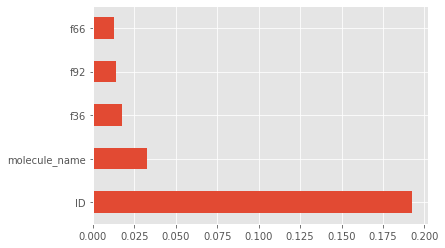

<Figure size 14400x7200 with 0 Axes>

In [122]:
import pandas as pd
import numpy as np

X = data.iloc[:,0:169]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')

plt.figure(figsize= (200,100))
plt.show()

The number of features for each class

Text(0, 0.5, 'Frequency')

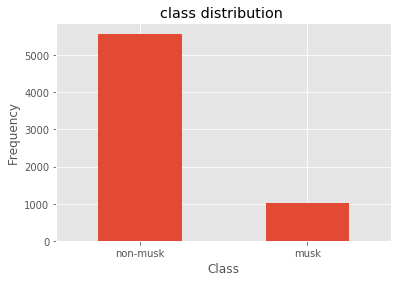

In [180]:
#plot the dataset frequency
labels = ['non-musk', 'musk']
classes = pd.value_counts(data['class'],sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("class distribution ")
plt.xticks(range(2), labels )
plt.xlabel("Class")
plt.ylabel("Frequency")

In [124]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


Accuracy using only one feature

In [125]:
model = XGBClassifier()
model.fit(X_train[['f71']], y_train)
y_pred = model.predict(X_test[['f71']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.50%


Confusion matrix:
 [[1103   38]
 [ 127   52]]


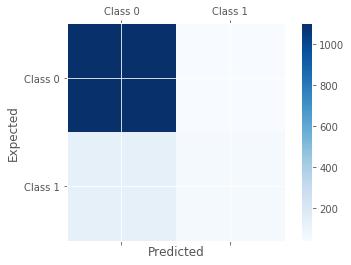

In [126]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Resampling



In [0]:
# Class count
count_class_0, count_class_1 = data['class'].value_counts()

# Divide by class
df_class_0 = data[data['class'] == 0]
df_class_1 = data[data['class'] == 1]

Over-sampling


Random over-sampling:
1    5581
0    5581
Name: class, dtype: int64


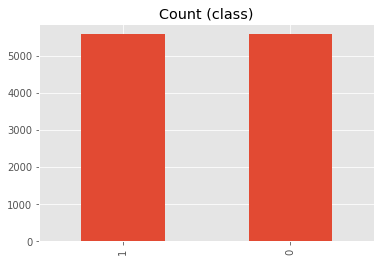

In [128]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['class'].value_counts())

df_test_over['class'].value_counts().plot(kind='bar', title='Count (class)');

In [129]:
df_test_over.shape

(11162, 170)

In [0]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
#Kearas libraries 
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import plot_model


In [0]:
features = df_test_over.drop(['class'], axis = 1)
labels = pd.DataFrame(df_test_over['class'])

feature_array = features.values
label_array = labels.values

In [132]:
sc = StandardScaler()
feature_array = sc.fit_transform(feature_array)
feature_array

array([[-0.56719658, -0.67390935, -0.57373177, ..., -0.14961856,
         0.46437696,  0.14756176],
       [-0.56670004, -0.67390935, -1.11808975, ..., -0.14961856,
         0.46437696,  0.14756176],
       [-0.5662035 , -0.67390935,  1.4921988 , ..., -0.19407833,
         0.41681287, -0.00573263],
       ...,
       [-0.56818966,  1.51740255,  0.64910137, ..., -0.17184844,
         0.30583   ,  0.12201269],
       [-0.61486458, -0.19580493,  0.42294299, ..., -0.37191741,
        -1.77113512, -0.97659709],
       [-0.66203604, -1.430908  , -0.3044455 , ..., -0.19407833,
         0.28997531,  0.09646363]])

In [0]:
#Splitting dataset 80:20 ratio 
X_train,X_test,Y_train,Y_test = train_test_split(feature_array,label_array,test_size=0.20)

In [0]:
# Normalize the testing and training set
X_train = normalize(X_train)
X_test = normalize(X_test)

In [135]:
X_train.shape

(8929, 169)

In [0]:
my_model= Sequential()

#First layer 

my_model.add(Dense(25,activation= 'relu', kernel_initializer= 'random_normal', input_shape = (169,)))

my_model.add(Dropout(0.5))
#Second layer 
my_model.add(Dense(25, activation='relu', kernel_initializer= 'random_normal'))
my_model.add(Dropout(0.5))

#output
my_model.add(Dense(1, activation='sigmoid', kernel_initializer= 'random_normal'))


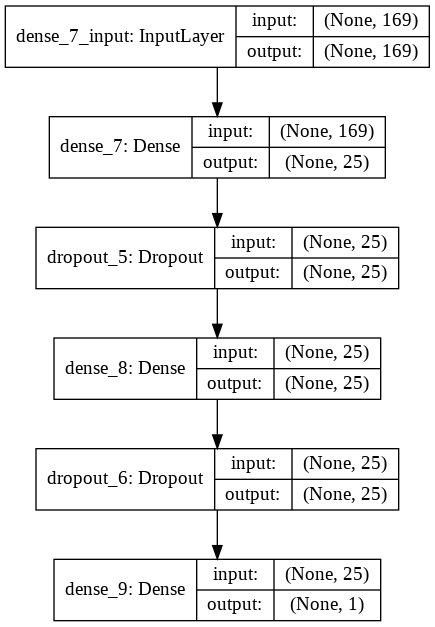

In [151]:
#Plot the model
plot_model(my_model, show_shapes= True, expand_nested= True, to_file= 'model.png')


In [0]:
sgd = SGD(lr = 0.01, momentum= 0.9)

Precision recall f1


In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:

my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

[[1143    5]
 [1072   13]]


In [141]:
# fit the model
history = my_model.fit(X_train,Y_train, validation_split= 0.20, batch_size = 32, epochs = 20)


Train on 7143 samples, validate on 1786 samples
Epoch 1/20
7143/7143 [==============================] - 1s 132us/step - loss: 0.5455 - acc: 0.7444 - f1_m: 0.7450 - precision_m: 0.7575 - recall_m: 0.7609 - val_loss: 0.2912 - val_acc: 0.8796 - val_f1_m: 0.8791 - val_precision_m: 0.8414 - val_recall_m: 0.9262
Epoch 2/20
7143/7143 [==============================] - 0s 56us/step - loss: 0.2472 - acc: 0.9075 - f1_m: 0.9071 - precision_m: 0.9071 - recall_m: 0.9120 - val_loss: 0.1691 - val_acc: 0.9367 - val_f1_m: 0.9338 - val_precision_m: 0.9285 - val_recall_m: 0.9425
Epoch 3/20
7143/7143 [==============================] - 0s 56us/step - loss: 0.1636 - acc: 0.9475 - f1_m: 0.9476 - precision_m: 0.9390 - recall_m: 0.9594 - val_loss: 0.1027 - val_acc: 0.9642 - val_f1_m: 0.9623 - val_precision_m: 0.9564 - val_recall_m: 0.9710
Epoch 4/20
7143/7143 [==============================] - 0s 56us/step - loss: 0.1063 - acc: 0.9678 - f1_m: 0.9677 - precision_m: 0.9586 - recall_m: 0.9792 - val_loss: 0.0644 -

In [154]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


In [0]:
val_accuracy = history.history['val_acc']

In [164]:
#print(val_accuracy)
val_mean_acc = np.mean(val_accuracy)
print(val_mean_acc)

0.9860022396182959


In [0]:
loss, accuracy, f1_score, precision, recall = my_model.evaluate(X_train,Y_train, verbose=0)

In [143]:
print(loss, accuracy, f1_score, precision, recall)


0.0006126003787575629 0.999888005375742 0.9998843923089271 0.9997760107381332 0.9999999999866492


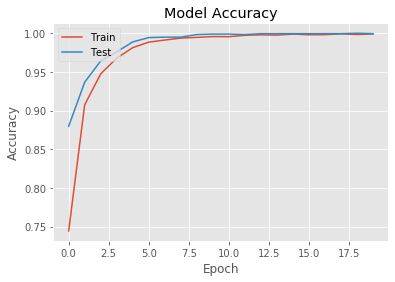

In [144]:
#Plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

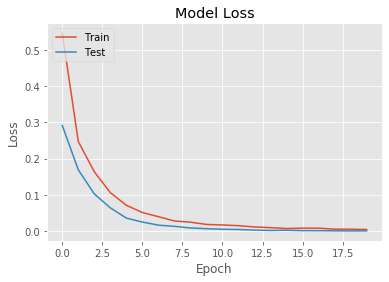

In [145]:
#plot model History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [148]:
y_pred = my_model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[1148    0]
 [   0 1085]]


In [165]:
print("Accuracy", accuracy *100)
print("Loss", loss*100)
print("F1- score", f1_score)
print("Recall", recall)
print("Precision", precision)
print("Validation accuracy", val_mean_acc)

Accuracy 99.98880053757419
Loss 0.06126003787575629
F1- score 0.9998843923089271
Recall 0.9999999999866492
Precision 0.9997760107381332
Validation accuracy 0.9860022396182959


In [0]:
my_model.save("my_model.h5")